#### Importing libraries

In [0]:
# dataset
from keras.datasets import mnist

# data preprocessing
import numpy as np
from keras.utils import np_utils

# visualisation
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# convolutional neural network
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Activation, Flatten

####Importing the data and preprocessing 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28
channels = 1

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

X_train = X_train.reshape(60000, img_rows, img_cols, channels)
X_test = X_test.reshape(10000, img_rows, img_cols, channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

input_shape = (img_rows, img_cols, channels)

#### Convolutional Neural Network

In [0]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))

model.add(Dense(84))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [83]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_16 (Activation)   (None, 24, 24, 6)         0         
_________________________________________________________________
average_pooling2d_7 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_17 (Activation)   (None, 8, 8, 16)          0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

#### Training and Testing the model

In [84]:
epochs = 25
batch_size = 128

history = model.fit(X_train, y_train,
                    batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test loss: ' + str(loss))
print('Test accuracy: ' + str(acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 47us/step - loss: 0.4220 - acc: 0.8766 - val_loss: 0.1759 - val_acc: 0.9477
Epoch 2/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1289 - acc: 0.9607 - val_loss: 0.0866 - val_acc: 0.9711
Epoch 3/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.0871 - acc: 0.9733 - val_loss: 0.0652 - val_acc: 0.9772
Epoch 4/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0675 - acc: 0.9798 - val_loss: 0.0629 - val_acc: 0.9786
Epoch 5/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.0559 - acc: 0.9827 - val_loss: 0.0470 - val_acc: 0.9844
Epoch 6/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0479 - acc: 0.9847 - val_loss: 0.0487 - val_acc: 0.9839
Epoch 7/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0422 - acc: 0.9871 - val_loss: 0.0420 - val_acc

#### Visualizing the performance of the model

In [85]:
hist = history.history

print(hist.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
train_acc = hist['acc']
val_acc = hist['val_acc']

train_loss = hist['loss']
val_loss = hist['val_loss']

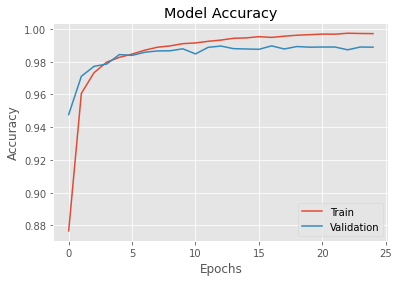

In [87]:
# plotting training and validation accuracy values
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

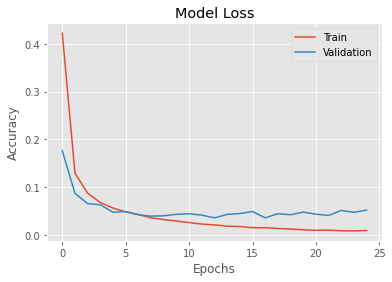

In [88]:
# plotting training and validation loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [0]:
# <h1> What we can learn about CNN architechtures from LeNet 
# as we go deeper into the networks, we notice that: 
# - the size of the feature maps typically shrink due to the Convolutional Layers and the Pooling Layers(basically a subsampling operation)
# - the number of feature maps continously increases
# LeNet was one of the most influential networks in the history of CNNs since almost all modern day CNN architechtures follow the same techniques